In [115]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [3]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [4]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [5]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [7]:
# Begin8
# There are three files in Module 8.It has weeks and labs and assignment uploads.The class size is small though with only 11 student final grades.
# 9 Students have passed and 2 student failed this module.
#

In [8]:
# Begin8 - START OF MODULE 8
# 3 FILEES in MODULE 8
# m8mg,m8ml
# Own grades and module logs

In [9]:
# Data Preperation Module 8
#
# Module 8

module8ml = pd.read_csv('Module8-MoodleLogs.csv')

In [10]:
module8mg = pd.read_csv('Module8-MoodleGrades.csv')

In [12]:
module8og = pd.read_csv('Module8-OwnGrades.csv')

In [13]:
print (module8og.columns.tolist())


['ID number', 'First Name', 'Surname', 'CA Mark', 'CA Mark/100', 'Exam Mark', 'Final Mark', 'Final Mark (Rounded)', 'Final Grade']


In [14]:
print (module8mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Labs (Real)', 'Quiz: CA1 - Quiz - 15% CA (Real)', 'Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)', 'Course total (Real)', 'Last downloaded from this course']


In [15]:
# Print the number of unique values in each modul8ml column
print(module8ml.nunique())

Time              952
User full name     11
Affected user       1
Event context      40
Component           9
Event name         23
Description        35
Origin              1
IP address          1
dtype: int64


In [16]:
# Print the number of unique values in each modul8og column
print(module8og.nunique())

ID number               11
First Name              11
Surname                 11
CA Mark                 11
CA Mark/100             11
Exam Mark               11
Final Mark              11
Final Mark (Rounded)    11
Final Grade              6
dtype: int64


In [17]:
# Print the number of unique values in each modul8mgl column
print(module8ml.nunique())

Time              952
User full name     11
Affected user       1
Event context      40
Component           9
Event name         23
Description        35
Origin              1
IP address          1
dtype: int64


In [18]:
# Cleanup8
#
#

In [19]:
#time8
time8 = module8ml["Time"].str.split(",", n = 1, expand = True)

In [20]:

# making separate Date column from new data frame 
module8ml["Date"]= time8[0] 

# making seperate Time column from new data frame
module8ml['Time']= time8[1]


In [21]:
# Convert the date column to datetime64
module8ml.Date = pd.to_datetime(module8ml.Date)

In [22]:
len(module8ml)

1759

In [23]:
#Timeedit8
mask8 = (module8ml['Date'] >= StartDate) & (module8ml['Date'] <= EndDate)

module8ml = module8ml.loc[mask8]

len(module8ml)


1026

In [24]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_8 = (module8ml['Date'] >= StartDate) & (module8ml['Date'] <= TriOne)

FirstFive8 = module8ml.loc[week5_8]

len(FirstFive8)


292

In [25]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_8 = (module8ml['Date'] >= TriOne) & (module8ml['Date'] <= TriTwo)

FirstTen8 = module8ml.loc[week10_8]

len(FirstTen8)


297

In [26]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_8 = (module8ml['Date'] >= TriTwo) & (module8ml['Date'] <= EndDate)

FirstFivt8 = module8ml.loc[week15_8]

len(FirstFivt8)


441

In [27]:
module8ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
IP address                object
Date              datetime64[ns]
dtype: object

In [28]:
module8ml = module8ml.drop(module8ml[['IP address','Origin','Description','Affected user']], axis=1)

In [29]:
module8ml.head(2)

,Time,User full name,Event context,Component,Event name,Date
15,12:33,azCY bvQB,Course: Module 8,System,Course viewed,2019-01-21
16,00:15,aa14 bMdv,Course: Module 8,User report,Grade user report viewed,2019-01-19


In [30]:
# new data frame with split value columns 
new8 = module8ml["User full name"].str.split(" ", n = 1, expand = True)


In [31]:
# making separate first name column from new data frame 
module8ml["First name"]= new8[0] 

# making separate last name column from new data frame 
module8ml["Last name"]= new8[1] 


In [32]:
module8ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
15,12:33,azCY bvQB,Course: Module 8,System,Course viewed,2019-01-21,azCY,bvQB
16,00:15,aa14 bMdv,Course: Module 8,User report,Grade user report viewed,2019-01-19,aa14,bMdv


In [33]:
module8ml_onehot = module8ml.copy()
module8ml_onehot = pd.get_dummies(module8ml_onehot, columns=['Event name'], prefix = ['Event name'])
module8ml_onehot = pd.get_dummies(module8ml_onehot, columns=['Event context'], prefix = ['Event context'])
module8ml_onehot = pd.get_dummies(module8ml_onehot, columns=['Component'], prefix = ['Component'])


print(module8ml_onehot.head())


      Time User full name       Date First name Last name  \
15   12:33      azCY bvQB 2019-01-21       azCY      bvQB   
16   00:15      aa14 bMdv 2019-01-19       aa14      bMdv   
17   00:07      aa14 bMdv 2019-01-19       aa14      bMdv   
18   20:41      azCY bvQB 2019-01-18       azCY      bvQB   
19   18:08      azCY bvQB 2019-01-18       azCY      bvQB   

    Event name_A file has been uploaded.  \
15                                     0   
16                                     0   
17                                     0   
18                                     0   
19                                     0   

    Event name_A submission has been submitted.  \
15                                            0   
16                                            0   
17                                            0   
18                                            0   
19                                            0   

    Event name_Badge listing viewed  Event name_Course module

In [34]:
module8ml_onehot.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module viewed,Event name_Course user report viewed,...,Event context_URL: URL,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report
15,12:33,azCY bvQB,2019-01-21,azCY,bvQB,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16,00:15,aa14 bMdv,2019-01-19,aa14,bMdv,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
#
#
#

In [39]:
m8mg = module8mg[['First name', 'Surname', 'ID number', 'Labs (Real)', 'Quiz: CA1 - Quiz - 15% CA (Real)', 'Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)', 'Course total (Real)']]

In [40]:
m8mg.head(2)

,First name,Surname,ID number,Labs (Real),Quiz: CA1 - Quiz - 15% CA (Real),Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real),Course total (Real)
0,a8NM,bDqB,U8NMDqBG,10.0,12.39,23.5,45.89
1,aSnR,bGk9,VSnRGk9O,9.5,11.19,24.5,45.19


In [41]:
#Engaged = > 55
engaged8 = module8og['Final Mark (Rounded)'] > 55


In [42]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module8og['engaged'] = np.where(module8og['Final Mark (Rounded)']>=55, '1', '0')


In [43]:
module8og['engaged'] = pd.to_numeric(module8og['engaged'])


In [45]:
print(module8og['engaged'].value_counts(dropna=False))

1    6
0    5
Name: engaged, dtype: int64


In [46]:
module8og.dtypes

ID number                object
First Name               object
Surname                  object
CA Mark                 float64
CA Mark/100             float64
Exam Mark               float64
Final Mark              float64
Final Mark (Rounded)    float64
Final Grade              object
engaged                   int64
dtype: object

In [47]:
m8og_subset = module8og

In [48]:
m8og_subset = m8og_subset.drop(m8og_subset[['Final Grade']], axis=1)

In [49]:
m8og_subset.dtypes

ID number                object
First Name               object
Surname                  object
CA Mark                 float64
CA Mark/100             float64
Exam Mark               float64
Final Mark              float64
Final Mark (Rounded)    float64
engaged                   int64
dtype: object

In [50]:
m8og_subset.head(2)

,ID number,First Name,Surname,CA Mark,CA Mark/100,Exam Mark,Final Mark,Final Mark (Rounded),engaged
0,tzCYvQBD,azCY,bvQB,29.21,58.42,75.0,66.71,66.71,1
1,tAK5SAbE,aAK5,bSAb,0.00,0.00,0.0,0.00,0.00,0


In [86]:
#
#
#

In [87]:
# Rename the columns of df2_melted: df2_tidy
m8og_subset_tidy = m8og_subset.rename(columns = {'First Name': 'First name',}, inplace = False)


In [88]:
# Onehot1 merge
merge_subset8 = pd.merge(module8ml_onehot,m8og_subset_tidy[['First name','engaged']],on='First name', how='left')


In [89]:
merge_subset8.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module viewed,Event name_Course user report viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report,engaged
0,12:33,azCY bvQB,2019-01-21,azCY,bvQB,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,00:15,aa14 bMdv,2019-01-19,aa14,bMdv,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
X8s = merge_subset8.iloc[:,5:72]  #independent columns
y8s = merge_subset8.iloc[:,-1]    #target column i.e engaged


In [91]:
X8s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade overview report viewed,Event name_Grade user report viewed,Event name_Quiz attempt reviewed,...,Event context_URL: URL,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
y8s.head(4)

0    1
1    0
2    0
3    1
Name: engaged, dtype: int64

In [93]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X8s,y8s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X8s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                             Specs      Score
20             Event context_File:  Steps(updated)  17.574968
59                                  Component_File   7.774095
3                  Event name_Course module viewed   6.588449
19                  Event context_Course: Module 8   5.587260
43  Event context_File: Lecture 1 - V Introduction   4.686366
22             Event context_File: Exam Guidelines   4.472805
56         Event context_Quiz: CA1 - Quiz - 15% CA   4.015337
63                                  Component_Quiz   4.015337
5                         Event name_Course viewed   3.984905
8              Event name_Grade user report viewed   3.748696


[  6.96369511e-05   3.59753135e-04   7.71727234e-03   5.21782124e-02
   2.56453777e-03   7.74684553e-03   1.32691181e-03   6.03783403e-03
   9.26200888e-03   2.31309437e-03   1.14924665e-02   0.00000000e+00
   1.72054749e-04   6.41222369e-04   4.92803598e-05   9.11030366e-03
   1.15681147e-03   1.59046633e-02   4.67377667e-03   2.96764818e-02
   2.12741199e-01   1.31138997e-02   9.65453008e-02   5.10002130e-03
   8.48202244e-03   1.72833735e-02   4.09684793e-03   1.39201465e-02
   1.91919905e-02   8.06391201e-03   1.73692247e-03   3.78196092e-03
   3.01763035e-03   7.15314328e-03   3.43959183e-03   3.05706383e-03
   1.47489531e-03   9.45490686e-03   6.47140997e-03   7.59879903e-03
   2.43593782e-02   1.67717905e-02   1.60619595e-02   5.95574979e-02
   2.32516500e-03   6.74197940e-03   1.64162650e-03   2.93004117e-03
   8.59798346e-04   3.33336700e-03   4.62721801e-04   1.60248343e-03
   1.38272733e-03   1.01582679e-02   2.64065738e-03   1.50951029e-02
   4.39338172e-02   1.28610587e-03

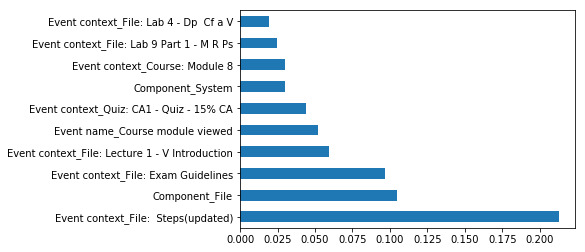

In [94]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X8s,y8s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X8s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


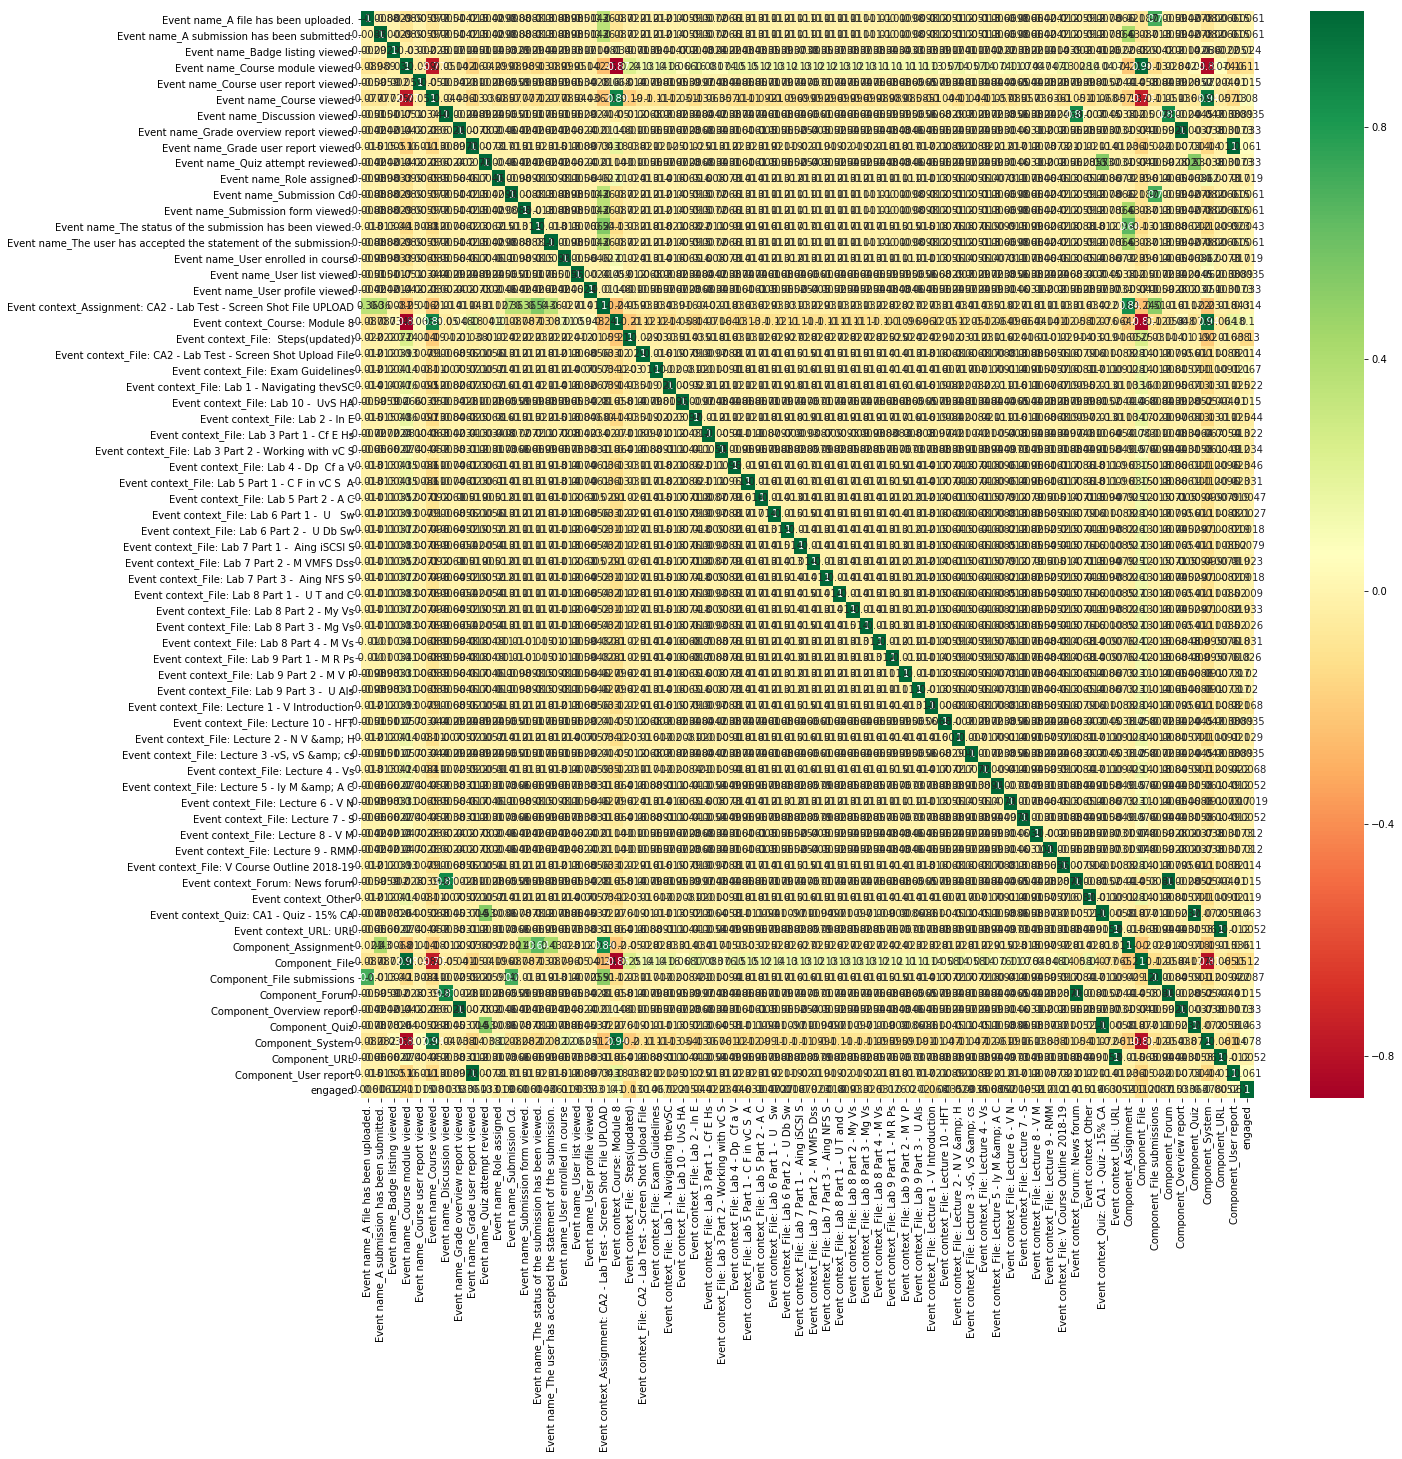

In [95]:
#get correlations of each features in dataset
corrmat = merge_subset8.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset8[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [97]:
# EndofFs8
# 20             Event context_File:  Steps(updated)  17.574968
#59                                  Component_File   7.774095
#3                  Event name_Course module viewed   6.588449
#19                  Event context_Course: Module 8   5.587260
#43  Event context_File: Lecture 1 - V Introduction   4.686366
#22             Event context_File: Exam Guidelines   4.472805
#56         Event context_Quiz: CA1 - Quiz - 15% CA   4.015337
#63                                  Component_Quiz   4.015337
#5                         Event name_Course viewed   3.984905
#8              Event name_Grade user report viewed   3.748696
#

In [96]:
featselect8 = X8s[['Event context_File:  Steps(updated)','Component_File','Event name_Course module viewed','Event context_Course: Module 8','Event context_File: Lecture 1 - V Introduction','Event context_File: Exam Guidelines','Event context_Quiz: CA1 - Quiz - 15% CA','Component_Quiz','Event name_Course viewed','Event name_Grade user report viewed']]

In [98]:
Xfs8 = featselect8 # Features
yfs8 = y8s # Target variable


In [99]:
# Split dataset into training set and test set
Xfs8_train, Xfs8_test, yfs8_train, yfs8_test = train_test_split(Xfs8, yfs8, test_size=0.3, random_state=1) # 70% training and 30% test


In [100]:
# Create Decision Tree classifer object
dtclffs8 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs8 = dtclffs8.fit(Xfs8_train,yfs8_train)

#Predict the response for test dataset
yfs8_pred = dtclffs8.predict(Xfs8_test)


In [107]:
cvscores_10dt = cross_val_score(dtclffs8, Xfs8_train, yfs8_train, cv = 10)
print(np.mean(cvscores_10dt))

0.640629890454


In [108]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs8 = LogisticRegression()

# fit the model with data
logregfs8.fit(Xfs8_train,yfs8_train)

#
ylg8_pred=logregfs8.predict(Xfs8_test)


In [109]:
cvscores_10lr = cross_val_score(logregfs8, Xfs8_train, yfs8_train, cv = 10)
print(np.mean(cvscores_10lr))

0.640649452269


In [110]:
# Instantiate the classifier
rfclffs8 = RandomForestClassifier()

# Fit to the training data
rfclffs8.fit(Xfs8_train, yfs8_train)

# Compute accuracy
print(rfclffs8.score(Xfs8_test, yfs8_test))


0.655844155844


In [111]:
cvscores_10rf = cross_val_score(rfclffs8, Xfs8_train, yfs8_train, cv = 10)
print(np.mean(cvscores_10rf))

0.639241001565


In [112]:
from sklearn.svm import SVC

svcfs8 = SVC()

#Train it, or "fit it", to the data:
svcfs8.fit(Xfs8_train, yfs8_train)

# Compute accuracy
print(svcfs8.score(Xfs8_test, yfs8_test))


0.665584415584


In [113]:
cvscores_10svc = cross_val_score(svcfs8, Xfs8_train, yfs8_train, cv = 10)
print(np.mean(cvscores_10svc))

0.643427230047


In [101]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs8_test, yfs8_pred))


Accuracy: 0.668831168831


In [102]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs8_test, yfs8_pred))


0.676056338028


In [103]:
# Import recall_score - High recall
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs8_test, yfs8_pred))


0.950495049505


In [104]:
#F1 score
# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(yfs8_test, yfs8_pred))


0.79012345679


In [105]:
print("Accuracy:",metrics.accuracy_score(yfs8_test, yfs8_pred))
print("Precision:",metrics.precision_score(yfs8_test, yfs8_pred))
print("Recall:",metrics.recall_score(yfs8_test, yfs8_pred))
print("F1 Score",metrics.f1_score(yfs8_test, yfs8_pred))

# F1 Score is the weighted average of Precision and Recall. 
#Therefore, this score takes both false positives and false negatives into account. 
#Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy,
#especially if you have an uneven class distribution

Accuracy: 0.668831168831
Precision: 0.676056338028
Recall: 0.950495049505
F1 Score 0.79012345679


In [106]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs8_test, yfs8_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs8_test, yfs8_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs8_test, yfs8_pred)))

Mean Absolute Error: 0.331168831169
Mean Squared Error: 0.331168831169
Root Mean Squared Error: 0.575472702366


In [51]:
#Feature selection
Xm8og = m8og_subset.iloc[:,3:8]  #independent columns
ym8og = m8og_subset.iloc[:,-1]    #target column i.e engaged


In [52]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(Xm8og,ym8og)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm8og.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                  Specs      Score
1           CA Mark/100  81.194473
3            Final Mark  69.067578
4  Final Mark (Rounded)  69.067578
2             Exam Mark  57.247922
0               CA Mark  40.597236


[ 0.23557143  0.08716667  0.10981746  0.25281746  0.31462698]


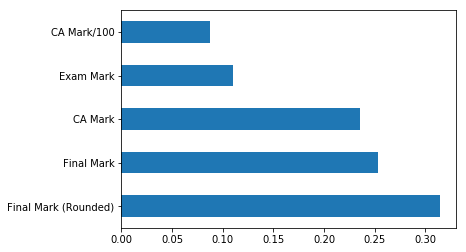

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm8og,ym8og)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm8og.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


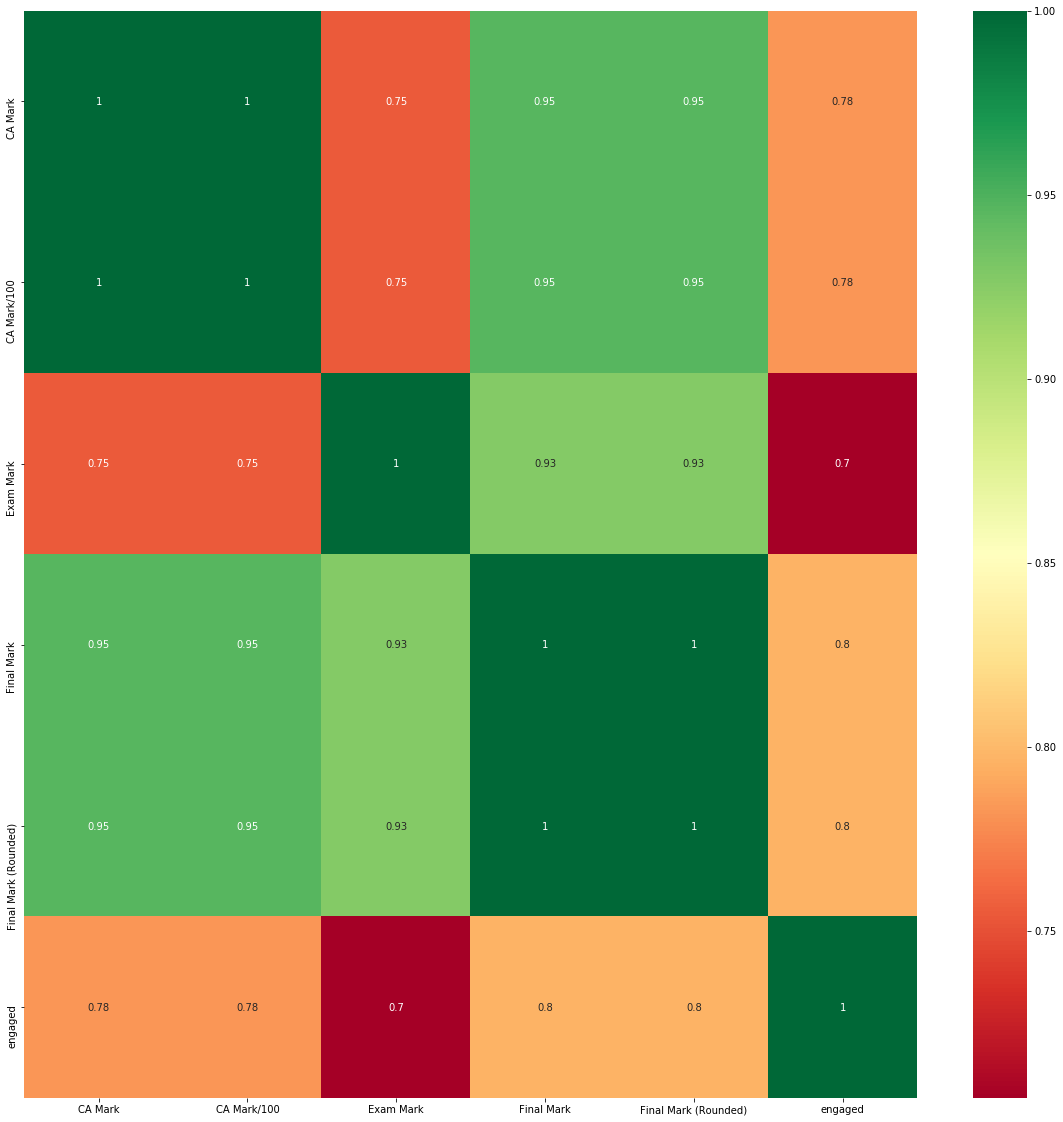

In [54]:
#get correlations of each features in dataset
corrmat = m8og_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(m8og_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [44]:
module8og.head(2)

,ID number,First Name,Surname,CA Mark,CA Mark/100,Exam Mark,Final Mark,Final Mark (Rounded),Final Grade,engaged
0,tzCYvQBD,azCY,bvQB,29.21,58.42,75.0,66.71,66.71,B,1
1,tAK5SAbE,aAK5,bSAb,0.00,0.00,0.0,0.00,0.00,F,0


In [55]:
m8og_subset.head(2)

,ID number,First Name,Surname,CA Mark,CA Mark/100,Exam Mark,Final Mark,Final Mark (Rounded),engaged
0,tzCYvQBD,azCY,bvQB,29.21,58.42,75.0,66.71,66.71,1
1,tAK5SAbE,aAK5,bSAb,0.00,0.00,0.0,0.00,0.00,0


In [57]:
m8mg.head()

,First name,Surname,ID number,Labs (Real),Quiz: CA1 - Quiz - 15% CA (Real),Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real),Course total (Real)
0,a8NM,bDqB,U8NMDqBG,10.0,12.39,23.5,45.89
1,aSnR,bGk9,VSnRGk9O,9.5,11.19,24.5,45.19
2,aAK5,bSAb,tAK5SAbE,0.0,0.00,0.0,0.00
3,a4jV,bO8M,14jVO8M7,9.5,10.33,24.0,43.83
4,aa14,bMdv,ba14Mdv9,6.5,9.61,11.0,27.11


In [58]:
#Engaged = > 55
engagedm8mg = m8mg['Course total (Real)'] > 55


In [59]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
m8mg['engaged'] = np.where(m8mg['Course total (Real)']>=55, '1', '0')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:

m8mg['engaged'] = pd.to_numeric(m8mg['engaged'])


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
m8mg_subset = m8mg

In [62]:
m8mg_subset.head(2)

,First name,Surname,ID number,Labs (Real),Quiz: CA1 - Quiz - 15% CA (Real),Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real),Course total (Real),engaged
0,a8NM,bDqB,U8NMDqBG,10.0,12.39,23.5,45.89,0
1,aSnR,bGk9,VSnRGk9O,9.5,11.19,24.5,45.19,0


In [64]:
#Feature selection
Xm8mg = m8mg_subset.iloc[:,3:7]  #independent columns
ym8mg = m8mg_subset.iloc[:,-1]    #target column i.e engaged


In [65]:

# No one passed the course total real > 55
ym8mg

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: engaged, dtype: int64

In [66]:
Xm8mg.head(2)

,Labs (Real),Quiz: CA1 - Quiz - 15% CA (Real),Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real),Course total (Real)
0,10.0,12.39,23.5,45.89
1,9.5,11.19,24.5,45.19


In [67]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(Xm8mg,ym8mg)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm8mg.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


Empty DataFrame
Columns: [Specs, Score]
Index: []


[ 0.  0.  0.  0.]


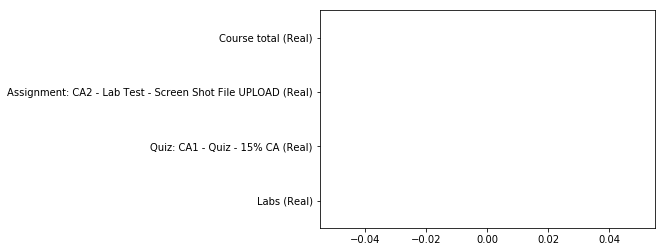

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm8mg,ym8mg)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm8mg.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


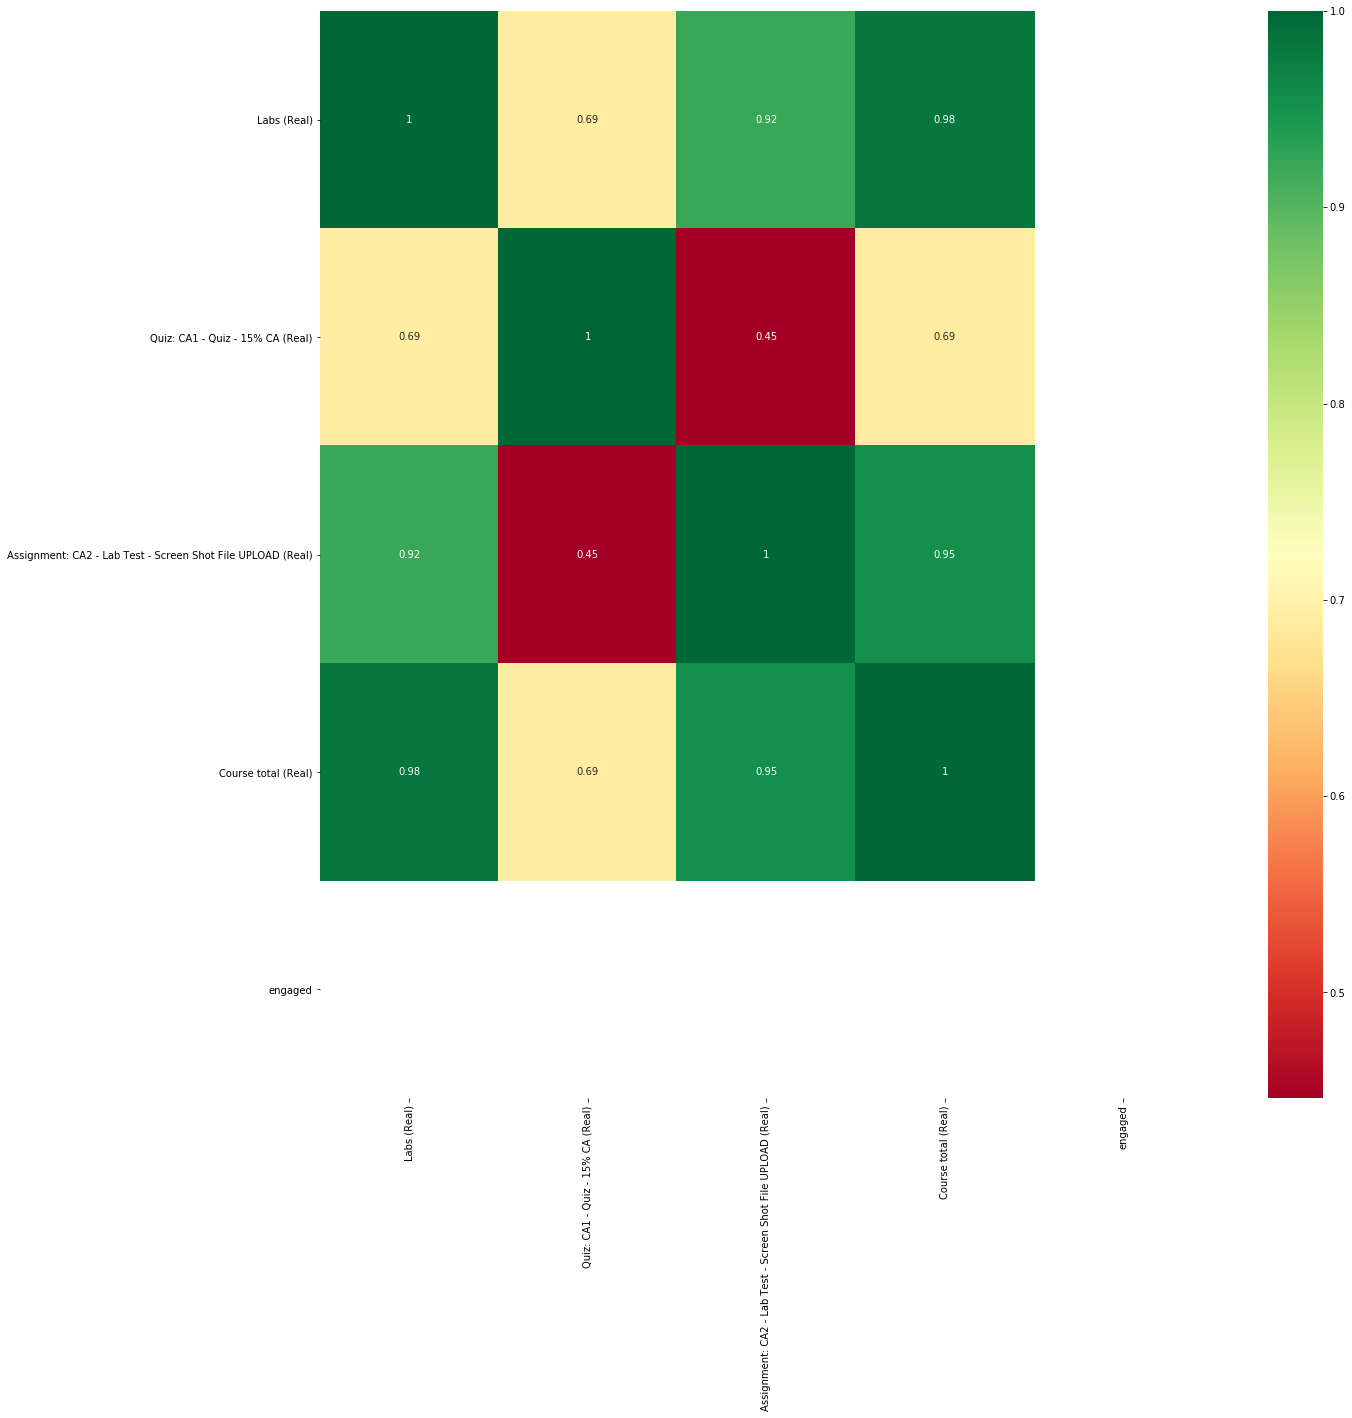

In [69]:
#get correlations of each features in dataset
corrmat = m8mg_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(m8mg_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


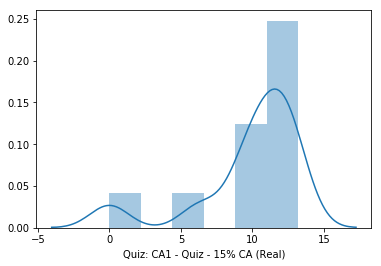

In [70]:
# Visualize the distribution of Quiz: CA1 - Quiz - 15% CA (Real) in Module 8'

sns.distplot(m8mg['Quiz: CA1 - Quiz - 15% CA (Real)'])

In [71]:
module8og.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CA Mark,11.0,31.850909,14.527275,0.0,24.785,31.59,44.505,47.07
CA Mark/100,11.0,63.701818,29.054549,0.0,49.570,63.18,89.010,94.14
Exam Mark,11.0,54.318182,25.029256,0.0,44.750,53.00,76.000,83.50
Final Mark,11.0,59.010000,25.341010,0.0,50.285,66.71,75.000,88.82
Final Mark (Rounded),11.0,59.010000,25.341010,0.0,50.285,66.71,75.000,88.82
engaged,11.0,0.545455,0.522233,0.0,0.000,1.00,1.000,1.00


In [74]:
module8ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
15,12:33,azCY bvQB,Course: Module 8,System,Course viewed,2019-01-21,azCY,bvQB
16,00:15,aa14 bMdv,Course: Module 8,User report,Grade user report viewed,2019-01-19,aa14,bMdv


In [79]:
module8ml.info

<bound method DataFrame.info of         Time User full name                     Event context    Component  \
15     12:33      azCY bvQB                  Course: Module 8       System   
16     00:15      aa14 bMdv                  Course: Module 8  User report   
17     00:07      aa14 bMdv                  Course: Module 8       System   
18     20:41      azCY bvQB                  Course: Module 8       System   
19     18:08      azCY bvQB                  Course: Module 8       System   
20     16:57      aw97 baOy                  Course: Module 8       System   
21     16:57      aw97 baOy                 Forum: News forum        Forum   
22     16:57      aw97 baOy                  Course: Module 8       System   
23     13:33      azCY bvQB                  Course: Module 8       System   
24     13:32      azCY bvQB                  Course: Module 8       System   
25     12:49      aa14 bMdv                  Course: Module 8  User report   
26     12:49      aa14 bMdv     

In [75]:
m8ml = module8ml

In [76]:
#m8ml = module8ml[[ 'Time', 'User full name','Event context','Component','Event name','Description']]


In [77]:
m8ml.describe().transpose()
# Student who was most frequent was aa14 bMdv
# Event context : Course Module 8 

#Affected user: Name of the user if the action is related to them.This has been removed as it is blank
#Time: Contains the d/m/y and time stamp of the log entry. # 8/11/18, 14:26 most frequent time
#User full name: Name of the user is listed in this column. - aa14 bMdv	 was the most engaged in the VLE
#Event context: It displays the name of the activity or resource. Ex: Course: Course: Course: Module 8		 was most frequent
#Component: Displays the type of the activity or resource. Ex: File, System, Assignment, File was most frequent
#Event name: In relation to users' action. Four actions that a user can do - CRUD .Course module viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.Viewed course most popular
#IP address: Shows the IP address of the user.This will be removed.
#Origin: Indicates whether the student performed an action using a desktop/laptop or mobile. Activity from a mobile device will be recorded as 'ws'.


,count,unique,top,freq,first,last
Time,1026,338,14:09,19,NaN,NaN
User full name,1026,11,aa14 bMdv,155,NaN,NaN
Event context,1026,40,Course: Module 8,471,NaN,NaN
Component,1026,9,File,474,NaN,NaN
Event name,1026,18,Course module viewed,485,NaN,NaN
Date,1026,41,2018-12-13 00:00:00,202,2018-09-20 00:00:00,2019-01-21 00:00:00
First name,1026,11,aa14,155,NaN,NaN
Last name,1026,11,bMdv,155,NaN,NaN


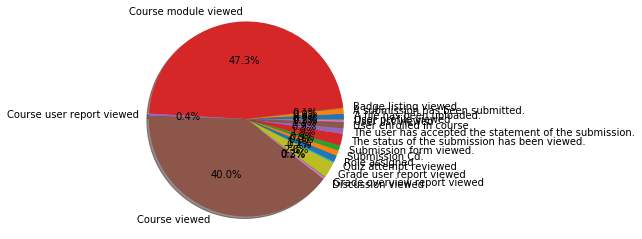

In [82]:
labels = module8ml['Event name'].astype('category').cat.categories.tolist()
counts = module8ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

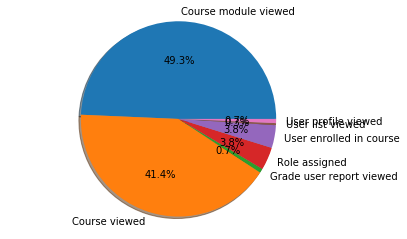

In [83]:
labels = FirstFive8['Event name'].astype('category').cat.categories.tolist()
counts = FirstFive8['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [85]:
FirstFive8["Event name"].value_counts()


Course module viewed        144
Course viewed               121
Role assigned                11
User enrolled in course      11
Grade user report viewed      2
User profile viewed           2
User list viewed              1
Name: Event name, dtype: int64

In [84]:
module8ml["Event name"].value_counts()


Course module viewed                                      485
Course viewed                                             410
Grade user report viewed                                   27
The status of the submission has been viewed.              20
User enrolled in course                                    11
Role assigned                                              11
Submission form viewed.                                     9
Submission Cd.                                              9
A submission has been submitted.                            9
The user has accepted the statement of the submission.      9
A file has been uploaded.                                   9
Course user report viewed                                   4
User list viewed                                            3
Discussion viewed                                           3
Quiz attempt reviewed                                       2
Grade overview report viewed                                2
User pro